In [5]:
import chess
import torch
import util
import chess
import pickle
from sigmazero import mcts, Node
import pandas as pd
from copy import deepcopy

In [2]:
games_csv = pd.read_csv('./data/chess_games.csv')

In [5]:
# check if elos above 2000
elos = games_csv[(games_csv['WhiteElo'] > 2000)]

In [12]:
# print column names
print(games_csv.columns)

Index(['Event', 'White', 'Black', 'Result', 'UTCDate', 'UTCTime', 'WhiteElo',
       'BlackElo', 'WhiteRatingDiff', 'BlackRatingDiff', 'ECO', 'Opening',
       'TimeControl', 'Termination', 'AN'],
      dtype='object')


In [3]:
# filter moves by rating threshold and no draws
games = games_csv[(games_csv['Result'] != '1/2-1/2') & (games_csv['Result'] != '*') & (games_csv['WhiteElo'] > 2200) & (games_csv['WhiteElo'] < 2210)]
print(len(games))
# reindex



16683


In [4]:
games = games.reset_index(drop=True)

moves = games['AN']
winners = games['Result']


In [15]:
board = chess.Board()
game1 = games['AN'][0]

In [ ]:
board.par

In [14]:
# split and check if move is legal
for move in game1.split():
    if chess.Move.from_uci(move) in board.legal_moves:
        board.push(chess.Move.from_uci(move))
    else:
        print('illegal move')
        break

InvalidMoveError: invalid san: '1.'

In [5]:
games_csv = None

In [6]:
len(moves)

16683

In [7]:
# loop through each game
states = []
values = []
board_fens = []
file_index = 1
positions = 1
for i in range(len(moves)):

    # if i % 2500 == 0 and i != 0:
    #     # save states and values
    #     pickle.dump(lichess_1800_states, open('./data/lichess_1200_states' + str(file_index) + '.pkl', 'wb'))
    #     pickle.dump(lichess_1800_values, open('./data/lichess_1200_values' + str(file_index) + '.pkl', 'wb'))
    #     lichess_1800_states.clear()
    #     lichess_1800_values.clear()
    #     file_index += 1
    #     print('saving ' + str(file_index))

    print(f'{i/len(moves)*100:.5f}%', end='\r')
    game = moves[i]
    winner = True if winners[i] == '1-0' else False
    board = chess.Board()
    move_num = 1
    for move in game.split():
        
        try:
            board.parse_san(move)
        except:
            continue

        states.append(util.one_hot_board(util.board_to_list(board)).unsqueeze(0))

        board_fens.append(board.board_fen())
            
        #state[0][13] += (1.0 / move_num)
        #state[0][13] *= (1.0 if board.turn == True else -1.0)
        # lichess_1800_states.append(state)
        
        values.append(torch.tensor([1.0 if winner else -1.0]))

        # check if move string is valid
        
        if positions % 512 == 0:
            states = torch.stack(states)
            values = torch.stack(values)
            batch = (states, values, board_fens)
            torch.save(batch, f'./data/ahhv2/batch2200_{file_index}.pt')
            file_index += 1

            states = []
            values = []
            board_fens = []

        board.push_san(move)
        positions += 1

        move_num += 1

states = torch.stack(states)
values = torch.stack(values)
batch = (states, values)
torch.save(batch, f'./data/ahhv2/batch2200_{file_index}.pt')

states = []
values = []

# pickle.dump(lichess_1800_states, open('./data/lichess_1200_states' + str(file_index) + '.pkl', 'wb'))
# pickle.dump(lichess_1800_values, open('./data/lichess_1200_values' + str(file_index) + '.pkl', 'wb'))
# lichess_1800_states.clear()
# lichess_1800_values.clear()

KeyboardInterrupt: 

In [6]:
class ChessDataset(torch.utils.data.Dataset):
    def __init__(self):
        # self.states = states
        # self.values = values
        pass
    def __len__(self):
        return 2193

    def __getitem__(self, idx):
        return torch.load(f'./data/ahh/batch2200_{idx+1}.pt')

In [7]:
deeta = ChessDataset()

In [2]:
import torch
from torch import nn
from sigmazero import ValueNetwork, SimpleValueNetwork
import pickle
import torchsummary

In [19]:
# lichess_1800_states = pickle.load(open('./data/lichess_1800_states.pkl', 'rb'))
# lichess_1800_values = pickle.load(open('./data/lichess_1800_values.pkl', 'rb'))

# shuffle
import random
c = list(zip(lichess_1800_states, lichess_1800_values))
random.shuffle(c)
lichess_1800_states, lichess_1800_values = zip(*c)


In [62]:
lichess_1800_states = pickle.load(open('./data/lichess_1800_states.pkl', 'rb'))
lichess_1800_values = pickle.load(open('./data/lichess_1800_values.pkl', 'rb'))

In [20]:
pickle.dump(lichess_1800_states, open('./data/lichess_1600_states.pkl', 'wb'))
pickle.dump(lichess_1800_values, open('./data/lichess_1600_values.pkl', 'wb'))

In [62]:
DEVICE = "cuda"

In [63]:
nnet = nnet.to(DEVICE)

In [5]:
nnet = SimpleValueNetwork().to(DEVICE)
nnet.load_state_dict(torch.load('./models/lichess_2200_simplevaluenet.pth'))
optimizer = torch.optim.Adam(nnet.parameters(), lr=0.00001)
criterion = nn.MSELoss().to(DEVICE)

In [67]:
optimizer = torch.optim.Adam(nnet.parameters(), lr=0.000001)

In [ ]:
BATCH_SIZE = 512

In [91]:
batches = []
for i in range(0, len(lichess_1800_states), BATCH_SIZE):
    batches.append((torch.cat(lichess_1800_states[i:i+BATCH_SIZE]).squeeze(), torch.cat(lichess_1800_values[i:i+BATCH_SIZE])))

In [9]:
# clear memory
lichess_1800_states = None
lichess_1800_values = None

In [9]:
import random

In [65]:
losses = []

In [17]:
# load all batches
batches = []

for pickles in range(1, 3):
    lichess_1800_states = pickle.load(open('./data/lichess_1200_states' + str(pickles) + '.pkl', 'rb'))
    lichess_1800_values = pickle.load(open('./data/lichess_1200_values' + str(pickles) + '.pkl', 'rb'))


    for i in range(0, len(lichess_1800_states), BATCH_SIZE):
        batches.append((torch.cat(lichess_1800_states[i:i+BATCH_SIZE]).squeeze(), torch.cat(lichess_1800_values[i:i+BATCH_SIZE])))
    # shuffle batches

In [34]:
deeta[4][0].shape

torch.Size([782, 1, 14, 8, 8])

In [60]:
# make dataloader
dataloader = torch.utils.data.DataLoader(deeta, batch_size=1, shuffle=True)

In [68]:
for epoch in range(10000):
    # iterate through datalodaer
    for i, batch in enumerate(dataloader):
        state = batch[0].to(DEVICE)
        value = batch[1].to(DEVICE)
        pred = nnet(state.squeeze().reshape(-1, 832))

        #p#rint(pred)
        loss = criterion(pred.squeeze(), value.squeeze().squeeze())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        if len(losses) > 100:
            losses.pop(0)
        avg_loss = sum(losses) / len(losses)
        print(f'Epoch: {epoch}, Batch Percent: {i/len(deeta)*100:.2f}%, Loss: {loss.item()} Avg Loss: {avg_loss}', end='\r')

KeyboardInterrupt: 

In [13]:
# save model
torch.save(nnet.state_dict(), './models/lichess_2200_simplevaluenet.pth')

In [9]:
import chess
import util

In [8]:
nnet = nnet.to("cpu")

In [20]:
test_board = chess.Board()

In [40]:
test_board.push_san("Nc3")

Move.from_uci('b1c3')

In [11]:
state = util.one_hot_board(util.board_to_list(test_board)).unsqueeze(0)
            
# state[0][13] += (1.0 / 1)
# state[0][13] *= (1.0 if test_board.turn == True else -1.0)

value = nnet(state)
value

tensor([[0.2658]], grad_fn=<TanhBackward0>)

In [79]:
test_board.push_san("Qh5")

Move.from_uci('d1h5')

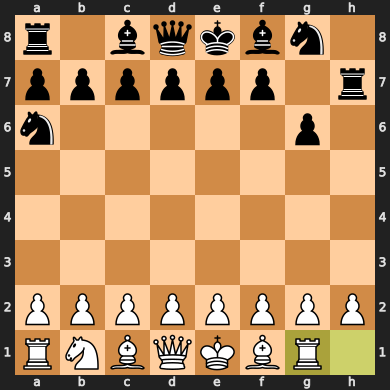

In [19]:
test_board

In [89]:
nnet.load_state_dict(torch.load('./models/lichess_1800.pth'))

<All keys matched successfully>

In [115]:
move_num = 4

In [30]:
test_board = chess.Board()

tensor([[0.9909]], grad_fn=<TanhBackward0>)
b6c7 -0.999213457107544 b6a7 -0.828793466091156 b6c5 -0.9683416485786438 b6a5 -0.36272722482681274 b6d4 -0.9936715960502625 b6e3 -0.9950283169746399 b6f2 -0.994694173336029 d2e1 -0.9990703463554382 d2d1 -0.9999669790267944 d2c1 -0.999566376209259 b2a3 -0.9932979345321655 b2a2 -0.999031126499176 b2c1 -0.9969658255577087 b2a1 -0.9993645548820496 h1h2 -0.989622175693512 g1f3 -0.9993763566017151 f1g2 -0.9936310052871704 b1e1 -0.9999362230300903 b1d1 -0.9997721910476685 b1c1 -0.999216616153717 b1a1 -0.9999805688858032 f4e5 -0.8735498189926147 a4b5 -0.991250216960907 h3g4 -0.9338921308517456 f4f5 -0.23190969228744507 h3h4 0.2263844758272171 d3d4 -0.9946190714836121 b3b4 -0.9999735951423645 e2e3 -0.9712424278259277 e2e4 -0.7868850827217102 

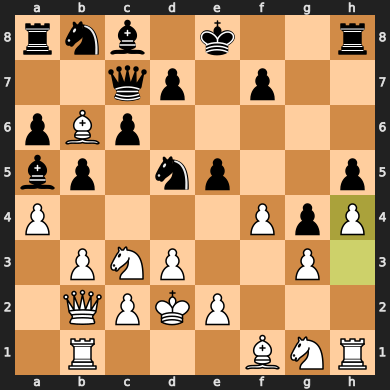

In [59]:
# value every move
legal_moves = list(test_board.legal_moves)
def eval_move(move):
    test_board.push(move)
    state = util.one_hot_board(util.board_to_list(test_board)).unsqueeze(0)
            
    state[0][13] += (1.0 / 2)
    state[0][13] *= (1.0 if test_board.turn == True else -1.0)

    value = nnet(state)
    test_board.pop()
    return -value

values = []

state = util.one_hot_board(util.board_to_list(test_board)).unsqueeze(0)
            
    # state[0][13] += (1.0 / 2)
    # state[0][13] *= (1.0 if test_board.turn == True else -1.0)
state = state[:, :13, :, :]
print(nnet(state))
    

for move in legal_moves:
    test_board.push(move)
    state = util.one_hot_board(util.board_to_list(test_board)).unsqueeze(0)
            
    # state[0][13] += (1.0 / 2)
    # state[0][13] *= (1.0 if test_board.turn == True else -1.0)
    state = state[:, :13, :, :]
    value = nnet(state)
    values.append(value.item() * (-1.0 if not test_board.turn else 1.0))
    print(move, value.item() * (-1.0 if not test_board.turn else 1.0), end=" ")
    test_board.pop()

# get index of max
max_index = values.index(max(values))


# move = mcts(Node(test_board), test_board, nnet, 800, move_num, "cpu", True)
test_board.push(legal_moves[max_index])
# print(move)
# move_num += 1
# test_board
test_board

In [48]:
test_board.push_san("g8f6")

Move.from_uci('g8f6')

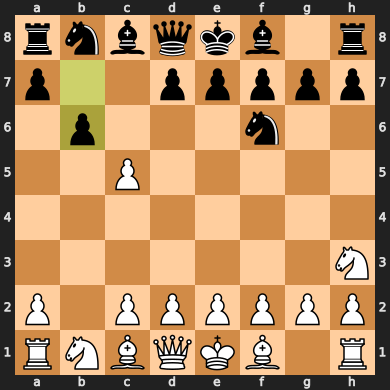